<div class="alert-info"><br>

**PURPOSE OF THIS NOTEBOOK**:

- develop a tool to compute the correlation function of a galaxy catalog
- play with some plots
    
INPUTS:

- file with a galaxy catalog<br />
    source: https://github.com/samotracio/gundam/tree/master/examples_data
- file with random positions for the catalog mask<br />
    source: https://github.com/samotracio/gundam/tree/master/examples_data

OUTPUTS:

- plots for:
    - correlation function of random points
    - correlation function of LRG
    - redshift distribution
    - catalog footprint
    
NOTES:
- this notebook has been developed within the "corr" environmet using python 3.8
- code repository:<br />
    https://github.com/mlares/FoF2022_DataAnalytics
- References:<br>
    https://academic.oup.com/mnras/article/432/3/1961/1746880

<br></div>

<div class="alert-info"><br>

**INDEX**    
    
- [Test correlation function of white noise](#noise)
- [Galaxy catalogue data](#cat)
    
<br>    
</div>
<br><br>

In [1]:
import numpy as np
from astroML.correlation import two_point
from astroML.correlation import bootstrap_two_point
from matplotlib import pyplot as plt
from astropy.cosmology import WMAP9 as cosmo
from astropy.table import Table

<a id='noise'></a>
<h3><center>Correlation function of white noise</center><h3>

In [2]:
np.random.seed(0)
X = np.random.random((5000, 2))
bins = np.linspace(0, 1, 20)

In [3]:
corr = two_point(X, bins)

In [4]:
print(corr)

[-0.00489445  0.00024338  0.00505635  0.00034864 -0.00138577 -0.00201552
 -0.00155164  0.00153195  0.00067426  0.00149916 -0.0014445  -0.00144603
  0.00188941  0.00207223  0.00352026 -0.00043062 -0.00010989 -0.00666314
 -0.01004156]


In [5]:
r = (bins[1:] + bins[:-1])/2

Text(0, 0.5, 'Correlation estimation')

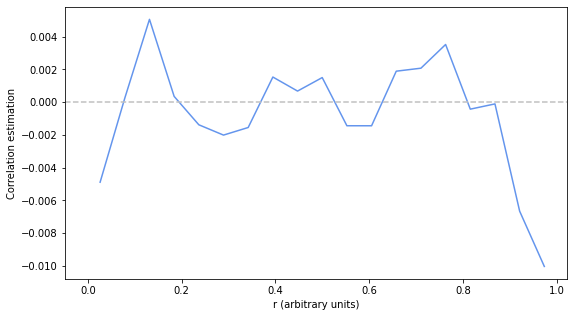

In [6]:
fig = plt.figure(figsize=(9, 5))
ax = fig.add_subplot()
ax.plot(r, corr, color='cornflowerblue')
ax.axline((0,0), slope=0, color='silver', linestyle='--')
ax.set_xlabel('r (arbitrary units)')
ax.set_ylabel('Correlation estimation')

In [7]:
np.allclose(corr, 0, atol=0.02)

True

**Over random data with bootsatrp error**

In [8]:
corr, dcorr = bootstrap_two_point(X, bins, Nbootstrap=5)

In [9]:
dcorr

array([0.00632446, 0.00308589, 0.00232834, 0.00201175, 0.00226378,
       0.00467875, 0.00374521, 0.00375248, 0.0024082 , 0.00264013,
       0.00160007, 0.00129613, 0.00260315, 0.00691315, 0.00716867,
       0.00859447, 0.00948758, 0.00720101, 0.0087494 ])

Text(0, 0.5, 'Correlation estimation')

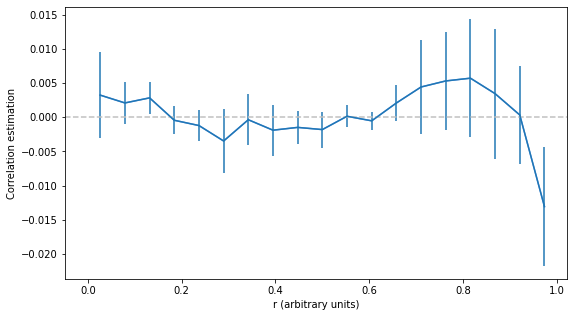

In [10]:
fig = plt.figure(figsize=(9, 5))
ax = fig.add_subplot()
ax.plot(r, corr, color='cornflowerblue')
ax.errorbar(r, corr, dcorr)
ax.axline((0,0), slope=0, color='silver', linestyle='--')
ax.set_xlabel('r (arbitrary units)')
ax.set_ylabel('Correlation estimation')

<a id='cat'></a>
<h3><center>Galaxy catalogue data</center><h3>

**Now using data: LRGs on SDSS DR7**

In [53]:
gals = Table.read('DR7-lrg.fits')
rans = Table.read('DR7-lrg-rand.fits')

In [54]:
gals

ra,dec,z
float64,float64,float32
56.16045237607176,-0.22135977246189154,0.4501842
58.247844859014094,0.2163290046718775,0.36716458
54.44538092803771,0.6199742187250149,0.41332436
54.48798289146134,0.48582565145724793,0.32246965
54.493298763099574,0.48324979295082066,0.3226457
55.55588584475714,0.5824416861316503,0.23346885
55.56861464711744,0.608277412471382,0.31364477
55.597200279698995,0.43402643470381574,0.35171625
55.76172735112215,0.4953153304717623,0.40320802


In [55]:
rans

ra,dec,z
float64,float64,float64
209.089259,17.276521,0.29326452640687256
183.927141,37.379032,0.27930067901230776
172.780433,32.981495,0.3652999495973588
187.272243,16.128839,0.27610712238750024
146.681736,53.845964,0.2708473635464046
175.280629,57.882506,0.20625216749017933
147.047698,-0.896691,0.2756810184393834
192.287258,51.19692,0.28222857802993473
114.863013,43.429469,0.2462664688744908


Text(0, 0.5, 'dN/dz')

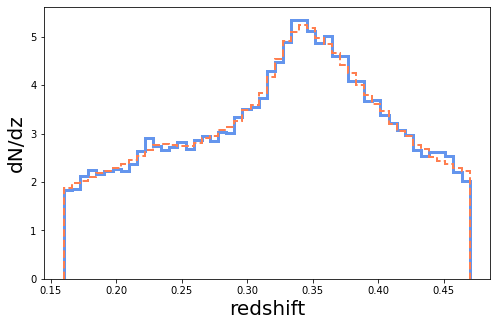

In [152]:
fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot()
h1 = ax.hist(gals['z'].value, histtype='step', density=True, bins=50,
        color='cornflowerblue', linewidth=3)
h2 = ax.hist(rans['z'].value, histtype='step', density=True, bins=50,
        color='coral', linestyle='--', linewidth=2)
ax.set_xlabel('redshift', fontsize=20)
ax.set_ylabel('dN/dz', fontsize=20)

filter galaxy sample: **redshift**

In [77]:
fltr_z = (gals['z'] > 0.01) & (gals['z'] < 0.2)
gals_z = gals[fltr_z]

Text(0.5, 1.0, 'galaxy sample within a redshift range: 0.01-0.2')

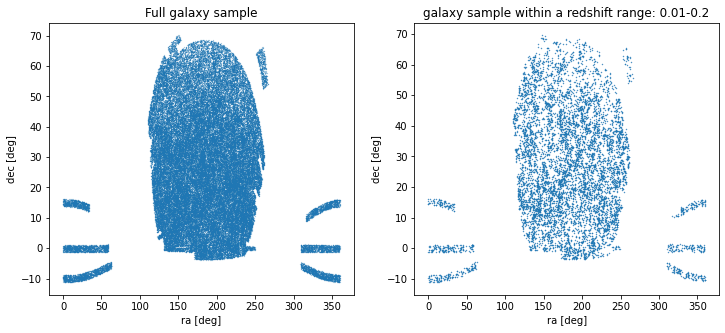

In [78]:
fig = plt.figure(figsize=(12, 5))
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(gals['ra'], gals['dec'], '.', markersize=0.3)
ax1.set_xlabel('ra [deg]')
ax1.set_ylabel('dec [deg]')
ax1.set_title('Full galaxy sample')
ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(gals_z['ra'], gals_z['dec'], '.', markersize=0.8)
ax2.set_xlabel('ra [deg]')
ax2.set_ylabel('dec [deg]')
ax2.set_title('galaxy sample within a redshift range: 0.01-0.2')

In [82]:
fltr_zr = (rans['z'] > 0.01) & (rans['z'] < 0.2)
rans_z = rans[fltr_zr]

Text(0.5, 1.0, 'random sample within a redshift range: 0.01-0.2')

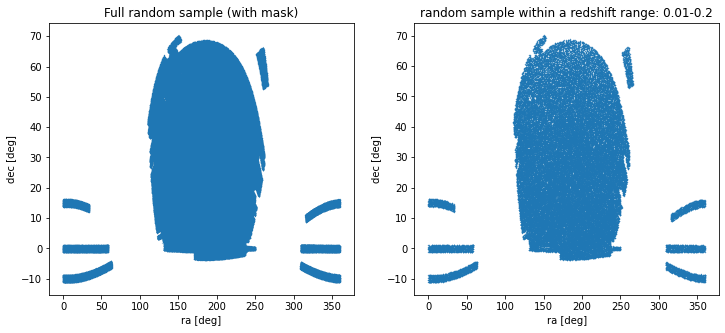

In [84]:
fig = plt.figure(figsize=(12, 5))
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(rans['ra'], rans['dec'], '.', markersize=0.3)
ax1.set_xlabel('ra [deg]')
ax1.set_ylabel('dec [deg]')
ax1.set_title('Full random sample (with mask)')
ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(rans_z['ra'], rans_z['dec'], '.', markersize=0.8)
ax2.set_xlabel('ra [deg]')
ax2.set_ylabel('dec [deg]')
ax2.set_title('random sample within a redshift range: 0.01-0.2')

Filter galaxy sample: **footprint**

In [88]:
fltr_m = (gals_z['ra']>190) & (gals_z['ra']<240) & (gals_z['dec']>0) & (gals_z['dec']<50)
gals_m = gals_z[fltr_m]

In [90]:
fltr_mr = (rans_z['ra']>190) & (rans_z['ra']<240) & (rans_z['dec']>0) & (rans_z['dec']<50)
rans_m = rans_z[fltr_mr]

Text(0, 0.5, 'dec [deg]')

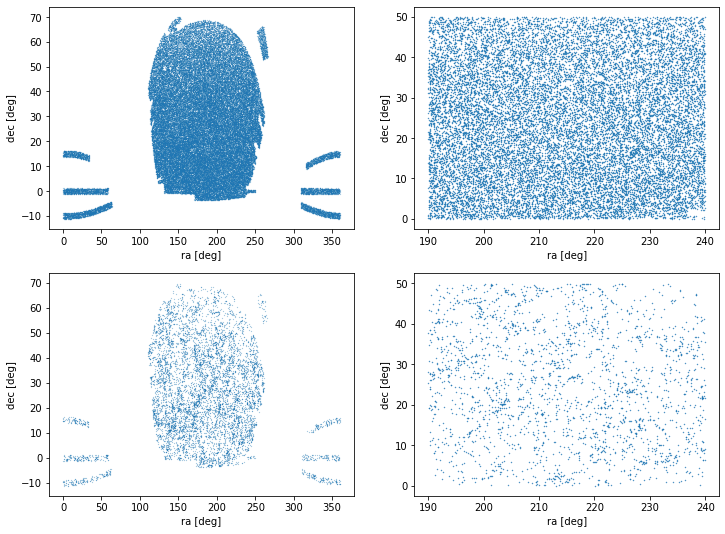

In [98]:
fig, ax = plt.subplots(2, 2, figsize=(12, 9))

ax[0,0].plot(rans_z['ra'], rans_z['dec'], '.', markersize=0.3)
ax[0,0].set_xlabel('ra [deg]')
ax[0,0].set_ylabel('dec [deg]')

ax[0,1].plot(rans_m['ra'], rans_m['dec'], '.', markersize=0.8)
ax[0,1].set_xlabel('ra [deg]')
ax[0,1].set_ylabel('dec [deg]')

ax[1,0].plot(gals_z['ra'], gals_z['dec'], '.', markersize=0.3)
ax[1,0].set_xlabel('ra [deg]')
ax[1,0].set_ylabel('dec [deg]')

ax[1,1].plot(gals_m['ra'], gals_m['dec'], '.', markersize=0.8)
ax[1,1].set_xlabel('ra [deg]')
ax[1,1].set_ylabel('dec [deg]')

Compute coordinates in redshift space

In [99]:
def get_zspace_coords(ra, dec, z):
    """
    ra, dec in degrees
    z: redshift
    returns: x, y, z
    """
    from math import pi
    from numpy import cos, sin
    ra = ra*pi/180.
    dec = dec*pi/180
    x = cos(dec)*cos(ra)*z
    y = cos(dec)*sin(ra)*z
    x = sin(dec)*z
    return x, y, z

In [111]:
redshifts = cosmo.comoving_distance(gals_m['z']).value
x, y, z = get_zspace_coords(gals_m['ra'].value,
                            gals_m['dec'].value, redshifts)

In [112]:
redshifts_ran = cosmo.comoving_distance(rans_m['z']).value

In [114]:
xr, yr, zr = get_zspace_coords(rans_m['ra'].value,
                               rans_m['dec'].value, redshifts_ran)

In [115]:
X = np.array([x, y, z])
X = X.transpose()

In [116]:
R = np.array([xr, yr, zr])
R = R.transpose()

In [136]:
bins = np.geomspace(1, 100, 21)

In [137]:
%time
z = two_point(X, bins, method='standard', data_R=R)

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 4.05 µs


In [138]:
z

array([51.934599  , 14.25831013, 24.02362862, 15.17173278,  9.89879295,
        8.69908086,  7.3337017 ,  5.08477292,  3.42517893,  2.67710467,
        1.65468801,  1.11072775,  0.71514877,  0.49074851,  0.30172272,
        0.1881778 ,  0.14815355,  0.09083577,  0.07216867,  0.05744801])

Text(0, 0.5, 'Correlation estimation')

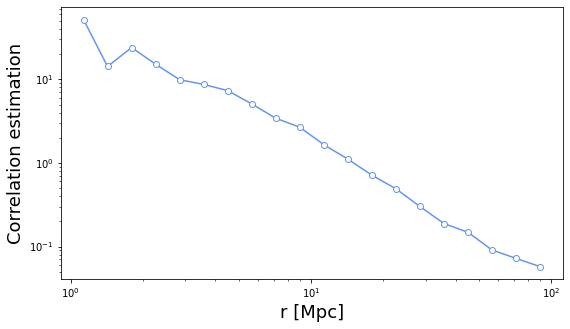

In [154]:
r = (bins[1:]+bins[:-1])/2
fig = plt.figure(figsize=(9,5))
ax = fig.add_subplot()
ax.plot(r, z, color='cornflowerblue')
ax.plot(r, z, 'o', color='cornflowerblue', mfc='white')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('r [Mpc]', fontsize=18)
ax.set_ylabel('Correlation estimation', fontsize=18)